In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# <i class="fas fa-circle" style="color: #f0ad4e;"></i> Projections and least squares with SVD 
<span style="background-color: #f0ad4e; color: white; border-radius: 10px; padding-top: 2px; padding-bottom: 2px; padding-left: 6px;padding-right: 6px;">exercise</span><span style="background-color: #343A40; color: white; border-radius: 10px; padding-top: 2px; padding-bottom: 2px; padding-left: 6px;padding-right: 6px;">notebook</span>
This exercise will modify the previous exercise `Introduction to the projections and least squares` to use matrix factorization. More explicitly this exercise showcases how `Singular Value Decomposition` (SVD) can be used to do projections and linear least square optimization as done previously in this course.

The first part of the exercise serves to provide some intuition about how to use SVD in python.

Let the matrix $A \in \mathbb{R}^{m\times n}$ be an $m$ by $n$ matrix. Recall, the SVD of $A$ is:  

$ \text{SVD}: \quad A = U D V^\top,$ 

where $U \in \mathbb{R}^{m\times m}$ is the orthonormal eigenvectors of the square matrix $AA^\top$ (column eigenvectors), $V^\top \in \mathbb{R}^{n\times n}$ is the the orthonormal eigenvectors of $A^\top A$ (row eigenvectors) and $D \in \mathbb{R}^{m\times n}$ is the (first) diagonal matrix of the singular values of A (square root of eigenvalues of the eigenvalues of the $A^\top A$ matrix).

## Linear independence of column vectors with SVD
If A is a square (same number of rows and columns) n by n matrix. Then $U$, $V^\top$ and $D$ will be square as well. We can use this to verify whether A consist of linearly independent columns e.i. the column space of A, span the entire space of $\text{dim}(A)$.

Recall that the columns vectors of A are independent if (and only if) the determinant of $A$ is nonzero. If we combine this with the property that 

$\text{det}(A*B) = \text{det}(A)*\text{det}(B)$,

We can determine that if $\text{det}(D)\not= 0 \Rightarrow \text{det}(A)\not= 0 $

<i class="fas fa-question"></i> What is the determinant of $U$ and $V^\top$? 

Which we can use to examine independence of the columns of a square matrix.


### Task A  

Given the following matrices in the cell below


In [7]:
A1 = np.array([
    [1, 0.5, 1/3, 0.25],
    [0.5, 1/3, 0.25, 0.2],
    [1/3, 0.25, 0.2, 1/6],
    [0.25, 0.2, 1/6, 1/7]
])

A2 = np.array([
    [-16, 15, -14, 13],
    [-12, 11, -10, 9],
    [-8, 7, -6, 5],
    [-4, 3, -2, 1]
])

A3 = np.random.randn(10,10)

A4 = np.array([
    [1, 1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/5, 1/7, 1/9],
    [1/4, 1/7, 1/8, 1/9],
])

A5 = np.random.randn(40,40)


<i class="fas fa-code"></i> Calculate the SVD of each matrix A1, A2, A3, A4 and A5 using `np.linalg.svd(A)` such that eg. $A1 = U1D1V1^\top$.  

<i class="fas fa-question"></i> What is the determinant of a diagonal matrix?

<i class="fas fa-code"></i> Use the diagonal matrices of each of the SVD's ($U1D1V1^\top$, $U2D2V2^\top$, $\ldots$) to determine which of the matrices have independent columnvectors? Verify your results by calculating the determinant.  


In [11]:
Calculate SVD of the matrices here
print out the singular values of the matrices with 3 decimal precision (use np.around to round the numbers).


[1.5   0.169 0.007 0.   ]
[38.623  2.071  0.     0.   ]
[5.361 4.219 3.33  2.676 2.401 1.661 1.552 1.178 0.501 0.058]
[1.473 0.113 0.023 0.   ]
[12.218 11.702 10.829 10.474 10.152  9.434  8.859  8.56   8.477  8.163
  7.797  7.086  6.965  6.44   6.215  5.679  5.443  5.228  5.029  4.89
  4.695  4.468  4.16   4.126  3.809  3.663  3.136  2.864  2.805  2.351
  2.176  1.827  1.801  1.323  0.957  0.866  0.703  0.513  0.44   0.104]


## Projections revisited
First, recall that a projection is a transformation that maps vectors onto a subspace in such a manner that the distances between original and projected points are minimised. 

We look at the example used in Week 4 of the exercises once again. We define a set of points $x_1, \dots, x_n$ (`points` in the code) and a line $L$ (defined as $y=0.5x$) that we want to project the points onto:


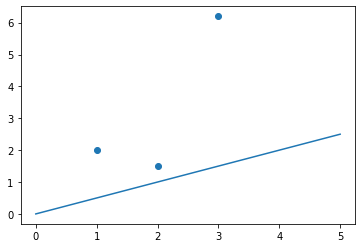

In [4]:
# Three points
points = np.array([
    [1, 2],
    [2, 1.5],
    [3, 6.2]
])

# Show plot
plt.scatter(points[:, 0], points[:, 1])

# Make line points (remember Numpy broadcasting)
x = np.linspace(0, 5)
y = x*0.5

# Plot line
plt.plot(x, y)


In this situation, projecting the points onto $L$ is done by multiplying by the projection matrix $P$, i.e. $\hat{x}_i = Px_i$. The resulting points $\hat{x}_i$ should then be "on" the line $L$. Let's try to accomplish exactly this by implementing the procedure in code.

First, we need to determine the projection matrix $P$ using the formula from the book:

$$
P = A(A^TA)^{-1}A^T
$$

In our case we want the line $L$ to be represented as the matrix $A$. From $y=0.5x$ we get the matrix $L: A = (1, 0.5)^\top$. The projection matrix is then simple to calculate (which you have already done).

## Projections with SVD

However, the projection matrix onto $L$ can be expressed neatly with the singular value decomposition of A,

SVD of A can be expressed as $A = U D V^\top$

If m>n in A ($m\times n$ matrix), we can derive that: 

$P = A(A^TA)^{-1}A^T = U D V^\top (V D^\top U^\top U D V^\top)^{-1}V D^\top U^\top$ 
 
$\Rightarrow P =  U D V^\top (V^\top)^{-1} (D^\top D)^{-1} V^{-1}V D^\top U^\top$
 
$ = U D (D^\top D)^{-1}D^\top U^\top$

Hence the Projection matrix can be calculated with the matrix product 

$$P = U D (D^\top D)^{-1} D^\top U^\top$$

### Task (B)

<i class="fas fa-code"></i> Calculate the $D (D^\top D)^{-1} D^\top$ and show by example that this it is a diagonal matrix with 1's for the first $k$ elements on the diagonal, where $k$ is the number of independent columnvectors A has, and the rest of the elements are 0's. 

<i class="fas fa-code"></i> In the cell below use SVD to do construct the projection matrix onto $L$


In [5]:

L = np.array([[1, 0.5]]).T # U has to be a column vector

Do SVD of L here and code the Projection matrix using the formula above


We now perform the projection itself ($\hat{x}_i = Px_i$):


In [6]:
### do the projection of the 3 points
x_hat = P_svd.dot(points.T)


Now, we want to *see* whether this actually worked or not. To do this, we plot the projected points as well as the old points and line:


(0.0, 6.5)

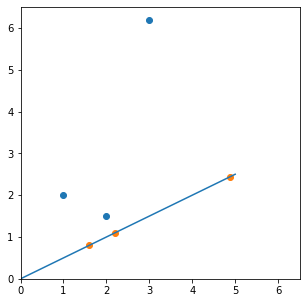

In [7]:
# Creating a square figure (makes it easier to visually confirm projection)
plt.figure(figsize=(5, 5))

# Plot everything
plt.scatter(points[:, 0], points[:, 1]) # Old points
plt.scatter(x_hat[0, :], x_hat[1, :]) # Projected points
#plt.scatter(points[:,0], x_hat) # Projected points
plt.plot(x, y) # Line

# Set axes limits to be the same for equal aspect ratio
plt.xlim(0, 6.5)
plt.ylim(0, 6.5)


Okay, it actually worked. As you should be able to verify, it clearly looks like the points are perpendicular to the line (shortest distance). 

This hopefully provided a review of creating a projection matrix and you managed to reproduce the results of the exercise from week 4. 

<i class="fas fa-code"></i> <i class="fas fa-question"></i> Try changing the points and line ($L$) and see if your projection (with SVD) still works.

<i class="fas fa-question"></i> Investigate matrix $D$ when the requirement of $m>n$ no longer holds true (is $D^\top D$ still invertible)?


<i class="fas fa-question"></i> Why does the projection (with SVD) break down if (m>n) in the A matrix ($m\times n)$? Is it reasonable to assume ($m > n) when doing projections? 


#### **The following section is a repetion of an exercise from week 4**

 (_optional_) <i class="fas fa-question"></i> Skim through the next section (until new content) if you need to revise projections and solving linear equations.

## Least squares 
Later in the course, projections are going to be used for other purposes (like PCA!), but for now the primary purpose is fitting linear models. A *linear model* is just a linear function (i.e. anything you can express with matrix operations) but using the term *model* makes it clear that our aim is to optimise it somehow for some purpose.

We focus on a simple two-dimensional case. As in the video lecture from the week on transformations, we have three points that don't quite fit a line perfectly:


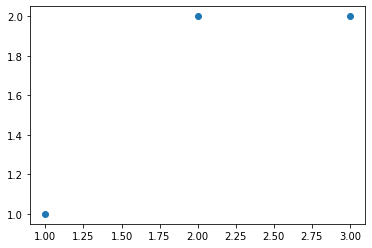

In [13]:
points2 = np.array([
    [1, 1],
    [2, 2],
    [3, 2]
])
plt.scatter(points2[:, 0], points2[:, 1])


We want to end up with a line that minimises some form of error, i.e. a best fitting line. This does, however, require us to look a bit differently on the problem than we did previously. In the previous section we projected a set of points onto an existing line. Now, we want to find a line that minimises the error of projecting the points onto it. The heart of the problem is the linear equation

$$
Ax = b
$$

Here, $x$ is the unknown and represents a line. This might be confusing because $x$ represented points in the previous section. Another way to understand this is that for a linear function of the form $f(x) = a*x + b$, we may write this in matrix form as either $[a, b]\binom{x}{1} = y$ or $[x, 1]\binom{a}{b} = y$. In other words we may either view the function in terms of the variables $x, y$ or the parameters $a, b$. Because we are fitting a line, we want to find the parameters $a, b$ given a number of already provided $(x, y)$ points. Writing out the full equation therefore gives us: 

$$
\left[\begin{array}{cc}x_1 & 1\\\vdots & \vdots \\x_n&1\end{array}\right] \binom{a}{b} = \mathbf{y} = \left[\begin{array}{c}y_1\\ \vdots \\y_n\end{array}\right]
$$

where $a, b$ are the unknown parameters we want to find. The $1$'s column is what allows this compact notation - it ensures that $b$ is treated as constant. Now, $A$'s column vectors are each elements of $R^n$ but only span a plane ($R^2$) in this space. This space represents all possible valid lines. Since $\mathbf{y}$ might not be placed on this plane, we cannot solve the equations directly.

As demonstrated in the book and lectures, we first have to project $\mathbf{y}$ onto the plane spanned by $A$. This leads to a new equation $A\hat{x}=\hat{\mathbf{y}}$ which **can** be solved using inverses. 


### Creating Design matrix (new content)
We start by creating the matrix $A$ (called the **Design Matrix**):


In [14]:
x_vals = points2[:, 0]
y_vals = points2[:, 1]


X = np.vstack((x_vals, np.ones(x_vals.shape))).T
X


array([[1., 1.],
       [2., 1.],
       [3., 1.]])

### Least squares with SVD 
The parameters of the best fitted line can be estimated by : $\hat{x} = (A^TA)^{-1}A^T \mathbf{y} = A^+\mathbf{y}$ 
\
where $A^+$ is the pseudoinverse (see the [ST] book page 222 for details):

Which can be expressed through a SVD: 


$$ \hat{x} = V (D^\top D)^{-1}D^\top U^\top  \mathbf{y}$$

### Task (C)
<i class="fas fa-code"></i> Use SVD and the equation above to do least square fit below


In [15]:
# Creating the matrix

Use np.linalg.svd(X) to do a SVD of X here and code the Projection matrix using the formula above


### Testing the least squares regression with SVD
Now we want to visualise the resulting line. The `params` vector is of the form $(a, b)$ and the line formula is $f(x)=ax+b$. Below, we calculate a number of points on the line for visualisation purposes and compare with both the original and projected points:


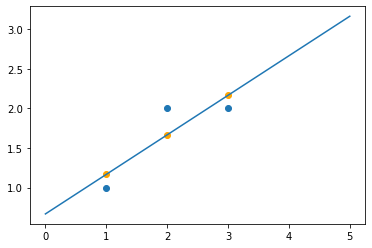

In [16]:
x = np.linspace(0, 5) # Create range of values
y = x*params[0] + params[1] # Calculate f(x)

plt.plot(x, y) # Plot line
plt.scatter(points2[:, 0], points2[:, 1]) # Plot original points

y_hat = X.dot(params) # Project original points onto the line (like in the last section)
plt.scatter(points2[:, 0], y_hat,color = 'orange') # Plot the points


In the cell below the $RMS$ error of the fit is calculated


In [17]:
#RMS error calculation
y_hat = X.dot(params)
e = y_vals-y_hat

np.sqrt((e**2).mean())


0.23570226039551595

<i class="fas fa-question"></i> Does the SVD least square produce the same fit as in week 4?
